### LGM VIP Internship - LetsGrowMore
### Intermediate Level Task-1 - Exploratory Data Analysis on Dataset - Terrorism
### AIM - As a security/defense analyst, try to find out the hot zone of terrorism.

### Name Of the Intern : Sweety Biswas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(181691, 135)

In [10]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country_Name','provstate':'State',
                  'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                  'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                  'motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'}, inplace = True)

In [13]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country_Name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [14]:
df.tail()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country_Name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [16]:
df  = df[['Year','Month','Extended','Day','Country_Name','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [17]:
df.head()

,Year,Month,Extended,Day,Country_Name,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [18]:
df.shape

(181691, 19)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Extended      181691 non-null  int64  
 3   Day           181691 non-null  int64  
 4   Country_Name  181691 non-null  object 
 5   State         181270 non-null  object 
 6   Region        181691 non-null  object 
 7   City          181257 non-null  object 
 8   Latitude      177135 non-null  float64
 9   Longitude     177134 non-null  float64
 10  AttackType    181691 non-null  object 
 11  Killed        171378 non-null  float64
 12  Wounded       165380 non-null  float64
 13  Target        181055 non-null  object 
 14  Summary       115562 non-null  object 
 15  Group         181691 non-null  object 
 16  Target_type   181691 non-null  object 
 17  Weapon_type   181691 non-null  object 
 18  Moti

In [20]:
df.isnull().sum()

Year                 0
Month                0
Extended             0
Day                  0
Country_Name         0
State              421
Region               0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Killed           10313
Wounded          16311
Target             636
Summary          66129
Group                0
Target_type          0
Weapon_type          0
Motive          131130
dtype: int64

In [21]:
df['Wounded'] = df['Wounded'].fillna(0) 
df['Killed'] = df['Killed'].fillna(0)

In [22]:
df.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.266860,2.883296
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.227057,34.309747
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Extended      181691 non-null  int64  
 3   Day           181691 non-null  int64  
 4   Country_Name  181691 non-null  object 
 5   State         181270 non-null  object 
 6   Region        181691 non-null  object 
 7   City          181257 non-null  object 
 8   Latitude      177135 non-null  float64
 9   Longitude     177134 non-null  float64
 10  AttackType    181691 non-null  object 
 11  Killed        181691 non-null  float64
 12  Wounded       181691 non-null  float64
 13  Target        181055 non-null  object 
 14  Summary       115562 non-null  object 
 15  Group         181691 non-null  object 
 16  Target_type   181691 non-null  object 
 17  Weapon_type   181691 non-null  object 
 18  Moti

In [24]:
df.corr()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.021252,0.017484
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.004031,0.003178
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.014586,-0.010175
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003225,-0.001082
Latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.013170,0.015920
Longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205
Killed,0.021252,0.004031,0.014586,-0.003225,-0.013170,-0.000587,1.000000,0.443326
Wounded,0.017484,0.003178,-0.010175,-0.001082,0.015920,0.000205,0.443326,1.000000


<AxesSubplot:>

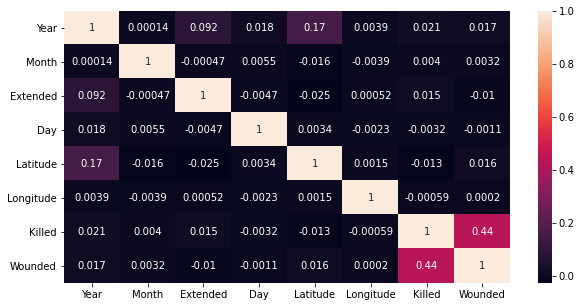

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True )

In [26]:
Year_data = df['Year'].value_counts().sort_values() 
Year_data

1971      471
1973      473
1972      568
1974      581
1970      651
1975      740
1976      923
1998      934
2004     1166
2003     1278
1977     1319
2002     1333
1999     1395
1978     1526
2000     1814
2001     1906
2005     2017
1982     2544
1981     2586
1980     2662
1979     2662
2006     2758
1986     2860
1983     2870
1985     2915
1996     3058
1995     3081
1987     3183
1997     3197
2007     3242
1994     3456
1984     3495
1988     3721
1990     3887
1989     4324
1991     4683
2009     4721
2008     4805
2010     4826
1992     5071
2011     5076
2012     8522
2017    10900
2013    12036
2016    13587
2015    14965
2014    16903
Name: Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

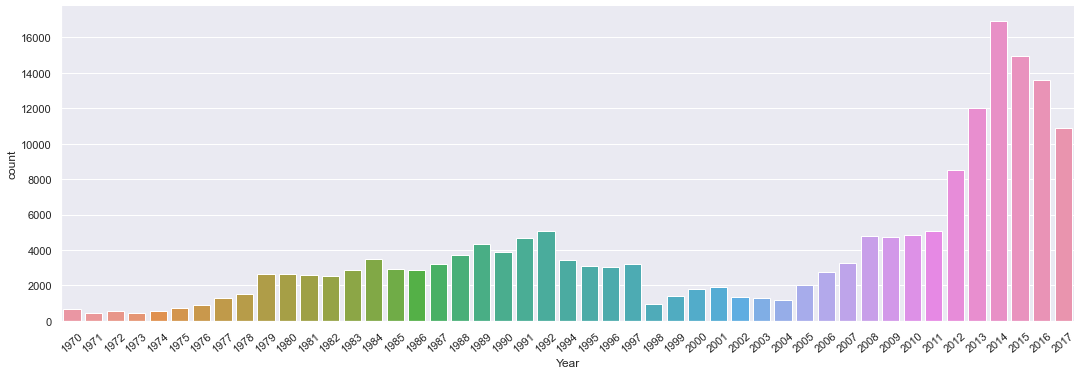

In [28]:
sns.set(rc={'figure.figsize':(20,15)})
sns.catplot(x="Year", kind ='count', data=df, height=5, aspect=3)
plt.xticks(rotation=40)

From above graphs we can easily conclude that , mostly attacks happened in the year 2013,14,15 amd 16

In [30]:
# 20 countries with most attacks
Country_data = df['Country_Name'].value_counts().nlargest(n=20)
Country_data

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country_Name, dtype: int64

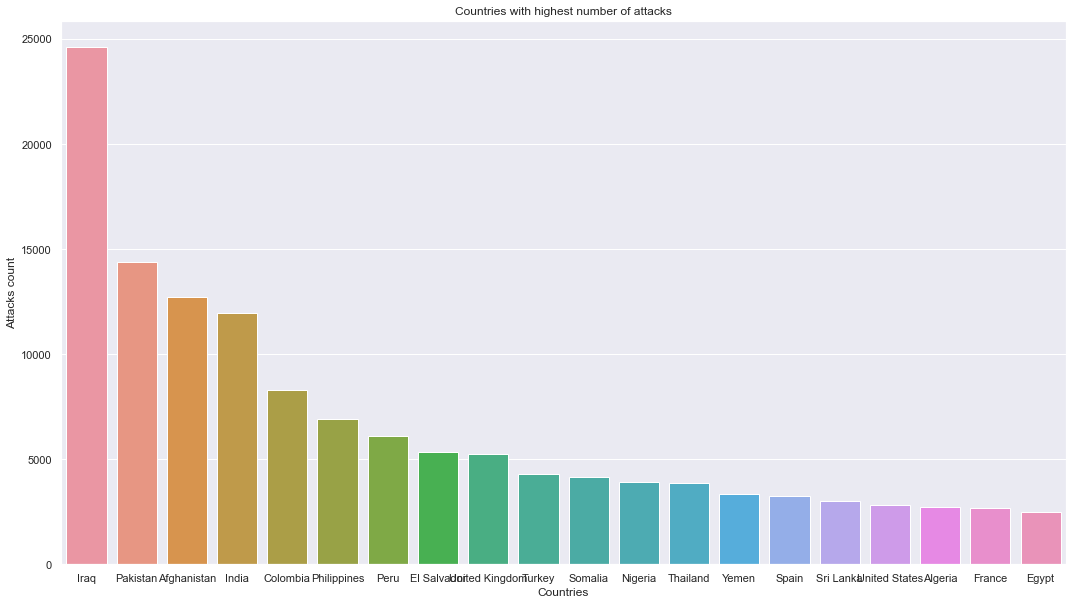

In [31]:
plt.figure(figsize= (18,10))
sns.barplot(x = Country_data.index , y = Country_data.values)
plt.title('Countries with highest number of attacks')
plt.xlabel('Countries')
plt.ylabel('Attacks count')
plt.show()

Top 5 Countries with most attacks are Iraq,Pakistan,Afganistan,India and columbia

In [32]:
# 20 States with most attacks
State_data = df['State'].value_counts().nlargest(n=20)
State_data

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

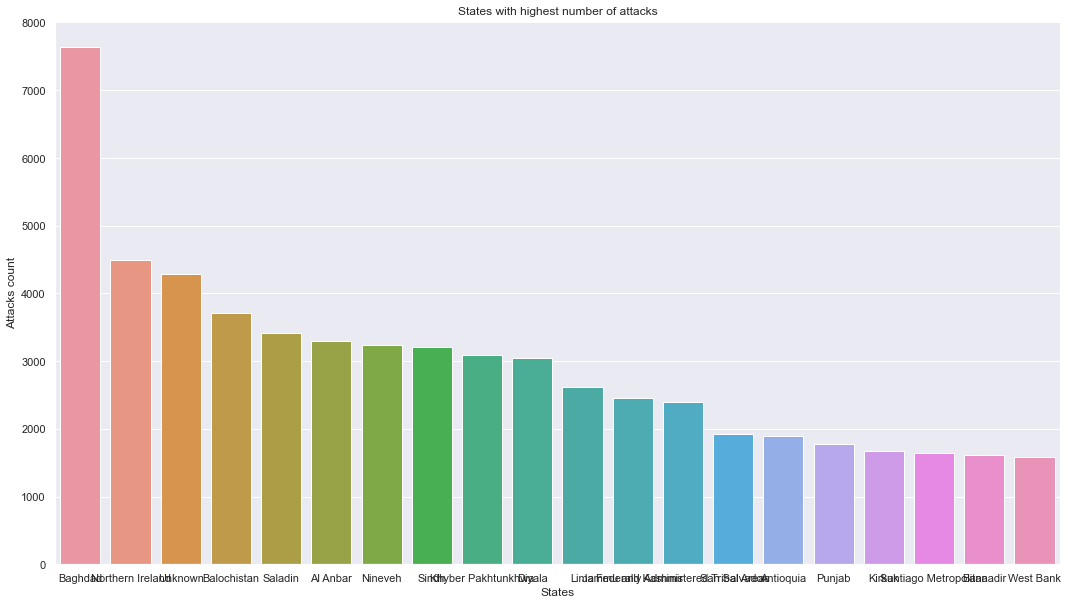

In [33]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = State_data.index , y = State_data.values)
plt.title('States with highest number of attacks')
plt.xlabel('States')
plt.ylabel('Attacks count')
plt.show()

Top 5 states with most attacks are Baghdad,Northern Ireland,Unknown,balochistan and saladin

In [34]:
# 20 States with most attacks
City_data = df['City'].value_counts().nlargest(n=20)
City_data

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Name: City, dtype: int64

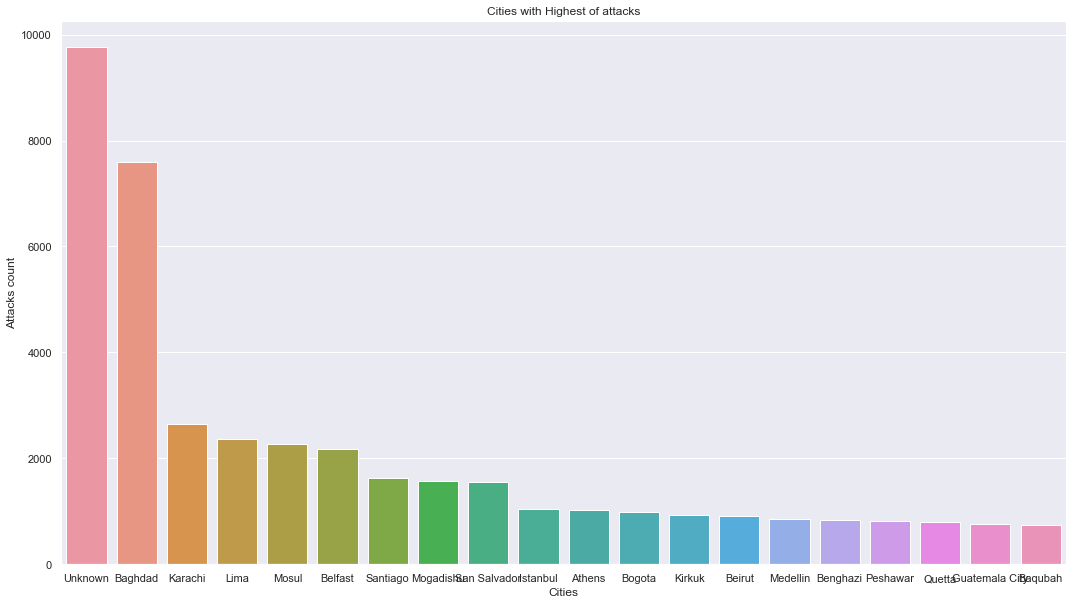

In [35]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = City_data.index , y = City_data.values)
plt.title('Cities with Highest of attacks')
plt.xlabel('Cities')
plt.ylabel('Attacks count')
plt.show()


In [36]:
# 20 States with most attacks
Region_data = df['Region'].value_counts()
Region_data

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

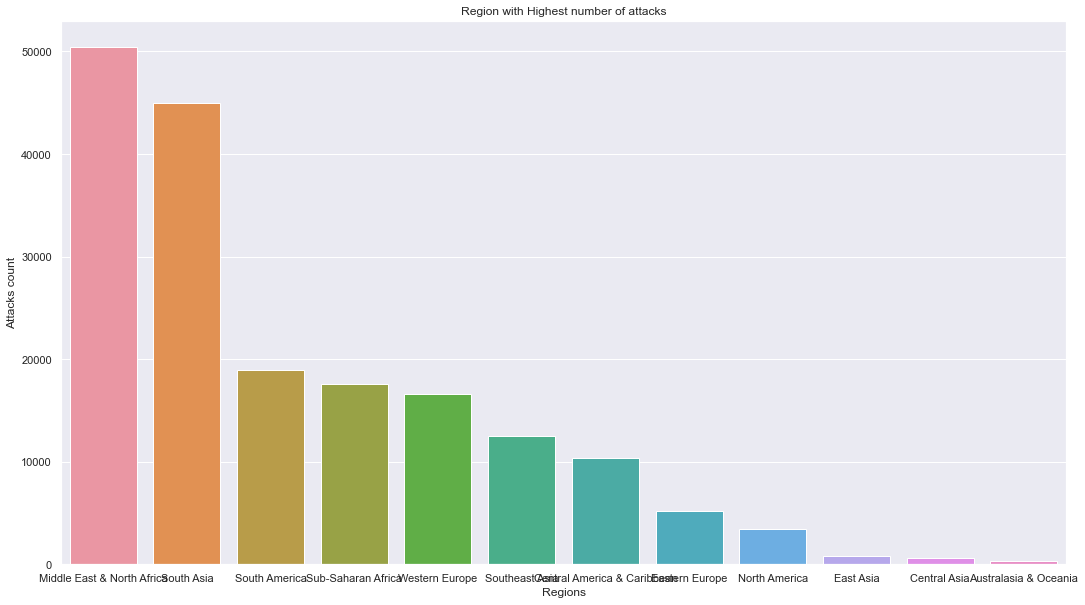

In [37]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Region_data.index , y = Region_data.values)
plt.title('Region with Highest number of attacks')
plt.xlabel('Regions')
plt.ylabel('Attacks count')
plt.show()

In [38]:
# Most frequent attck type
Attack_data = df['AttackType'].value_counts()
Attack_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

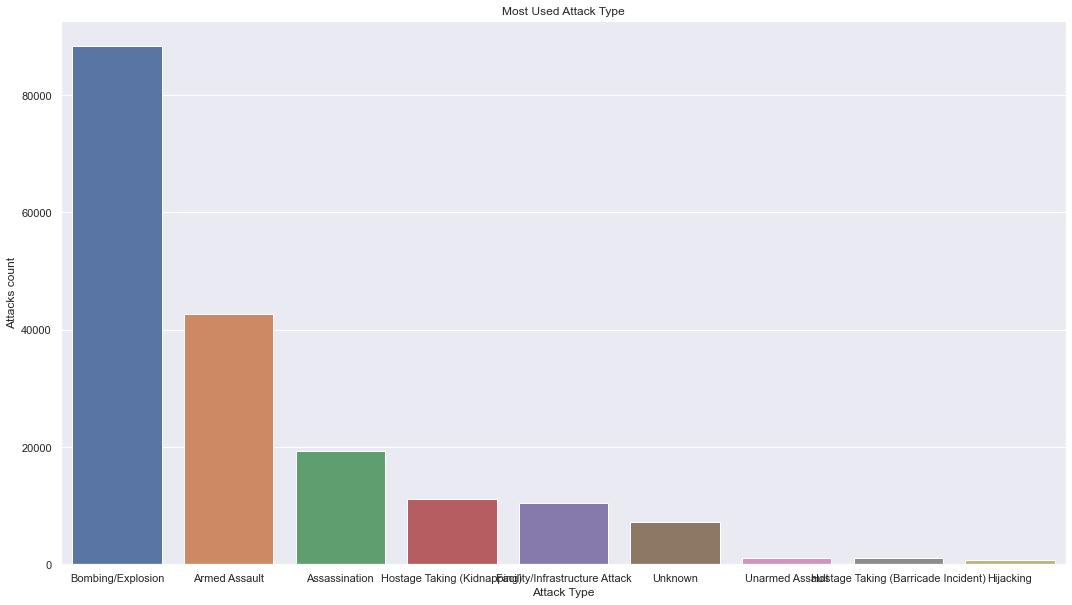

In [39]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Attack_data.index , y = Attack_data.values)
plt.title('Most Used Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Attacks count')
plt.show()


Most Frequent Terrorist Groups involved in Attacks

In [40]:
Group_data = df['Group'].value_counts().nlargest(n=20)
Group_data

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

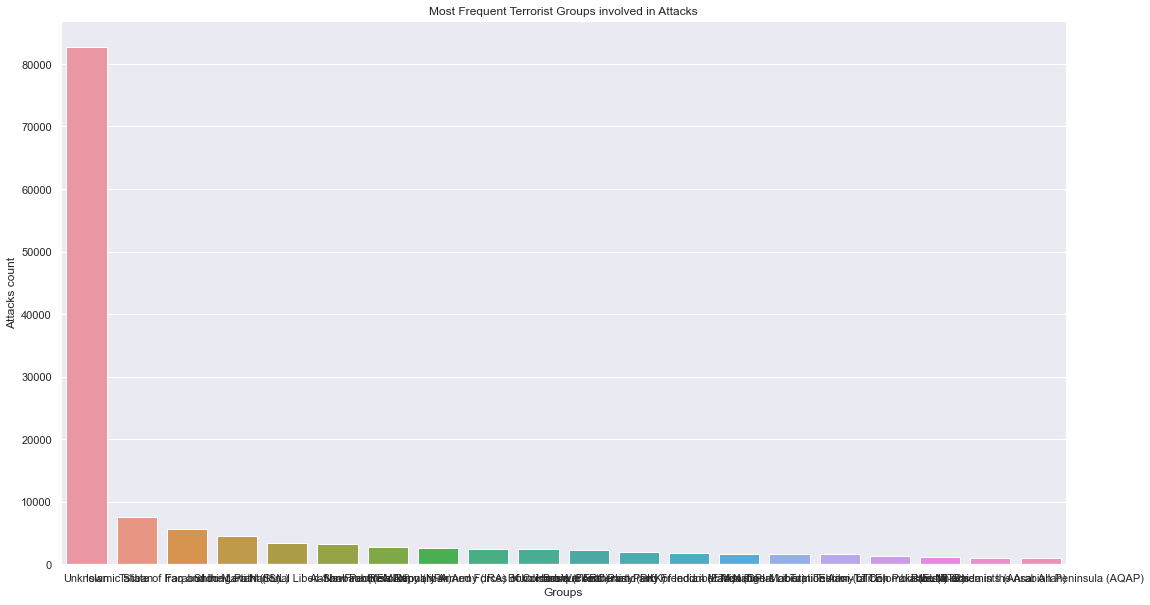

In [41]:
plt.figure(figsize= (18,10))
sns.barplot(x = Group_data.index , y = Group_data.values)
plt.title('Most Frequent Terrorist Groups involved in Attacks')
plt.xlabel('Groups')
plt.ylabel('Attacks count')
plt.show()

Most Used Weapon Type

In [42]:
Weapon_data = df['Weapon_type'].value_counts()
Weapon_data

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

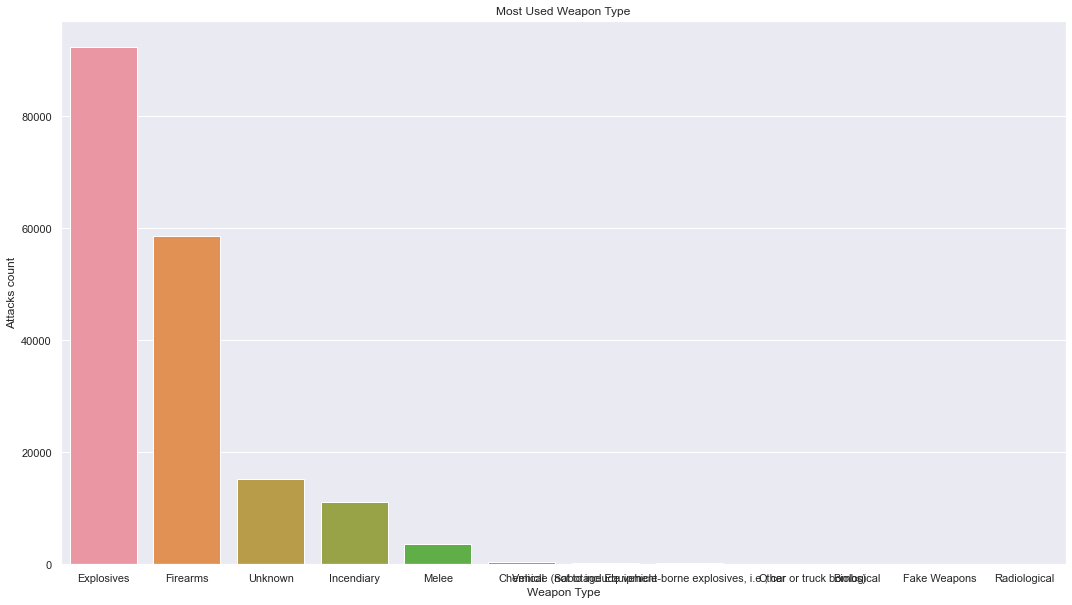

In [43]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Weapon_data.index , y = Weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.show()

Most Frequent Target Type

In [44]:
Target_data = df['Target_type'].value_counts().nlargest(n=15)
Target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Target_type, dtype: int64

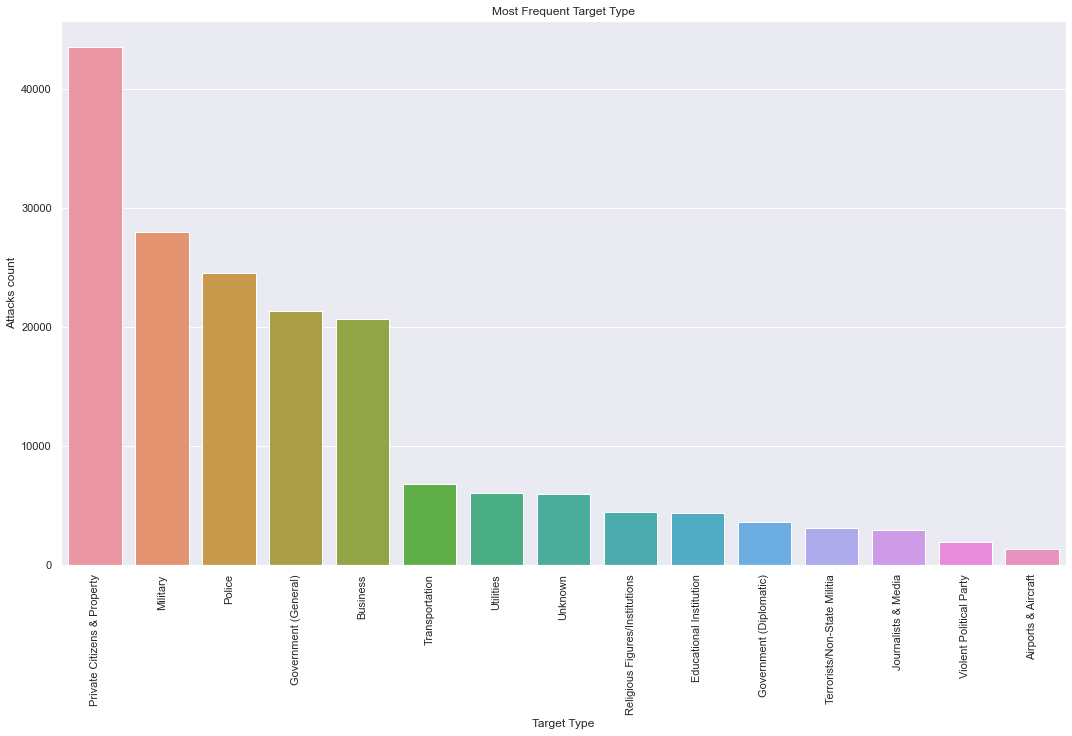

In [45]:
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

#### Conclusion :
#### Hot zones are -

#### Top 5 Countries with highest numbers of attacks are Iraq,Pakistan, Afghanistan, India and Columbia
#### Top 3 states with Highest numbers of attacks are Baghdad,Northern Ireland and Unknown state.
#### Top 3 Cities with most attacks are Unknown city, Baghdad and Karachi.
#### Top 3 regions with most attacks are Middle East & North Africa , South Asia and South America. Year with most attacks is 2014.
#### Most frequent terrorist groups involved in attacks are Taliban and Islamic State of Iraq and the Levant (ISIL).
#### Security issues and Insights drawn from the data are :
#### The most frequent attack found is Bombing/Explosion.
#### Most frequent target types are Private Citizens & Property and Military.